In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [25]:
labelsPath = '../data/names/obj.names'
LABELS = open(labelsPath).read().strip().split("\n")

In [26]:
weightsPath = '../data/weights/' + 'crop_weed_detection.weights'
configPath = '../data/cfg/crop_weed.cfg'

In [27]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

In [28]:
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


In [35]:
image = cv2.imread('../data/images/agri_0_113.jpeg')
(H, W) = image.shape[:2]

In [36]:
confi = 0.5
thresh = 0.5

[INFO] YOLO took 0.180379 seconds


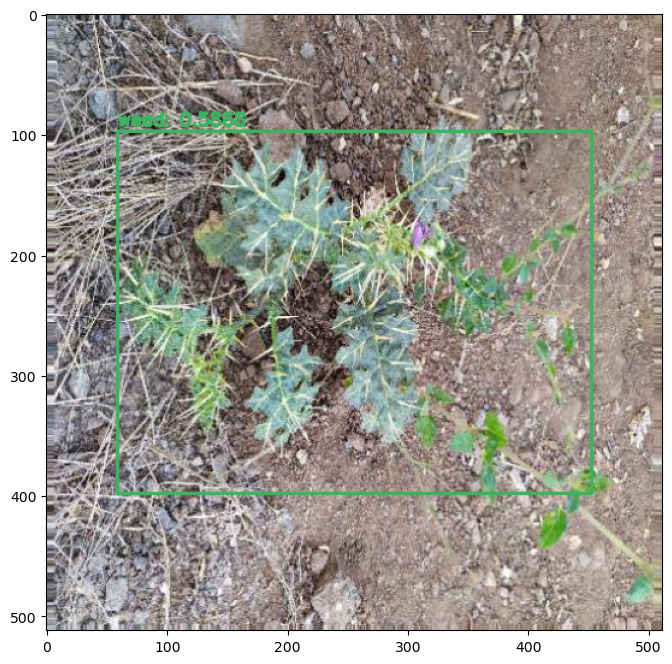

In [37]:
ln = net.getLayerNames()
unconnected_out_layers = net.getUnconnectedOutLayers()
ln = [ln[i - 1] for i in unconnected_out_layers]

#construct a blob from the input image and then perform a forward
#pass of the YOLO object detector, giving us our bounding boxes and
#associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()

#show timing information on YOLO
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

#initialize our lists of detected bounding boxes, confidences, and
#class IDs, respectively
boxes = []
confidences = []
classIDs = []

#loop over each of the layer outputs
for output in layerOutputs:
#loop over each of the detections
    for detection in output:

        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        if confidence > confi:

            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")


            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))


            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

#apply non-maxima suppression to suppress weak, overlapping bounding
#boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, confi, thresh)

#ensure at least one detection exists
if len(idxs) > 0:
    #loop over the indexes we are keeping
    for i in idxs.flatten():
        #extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        #draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
det = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(det)

In [13]:
path = 'detection.jpeg'#change if you want
det = cv2.cvtColor(det,cv2.COLOR_RGB2BGR)
cv2.imwrite(path,det)

True